<a href="https://colab.research.google.com/github/SWiwoo/CornStudy/blob/study/chapter2__%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mglearn

     |████████████████████████████████| 540 kB 26.5 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=16426bba74fc610743646362991cdf11caba36ba5caec064e447da5309ba92b7
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
import mglearn                                        # 앞으로 이 책에서 임포트되었다고 가정할 라이브러리들
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

## 2.3.8 커널 서포트 벡터 머신
- 커널 서포트 벡터 머신(보통 SVM이라 부름)은 입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것
- 서포트 벡터 머신을 분류와 회귀에 모두 사용 가능



---
### 선형 모델과 비선형 특성
- 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적
- 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것


Text(0, 0.5, 'feature 1')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


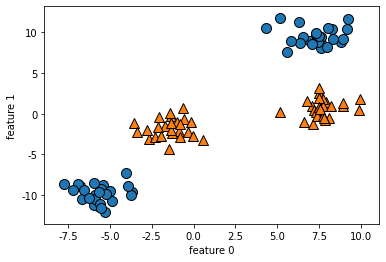

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

## 선형적으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋
## 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어맞지 않음

Text(0, 0.5, 'feature1')

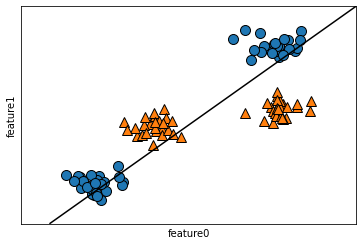

In [8]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC(max_iter=5000, tol=1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature0")
plt.ylabel("feature1")

Text(0.5, 0, 'feature1**2')

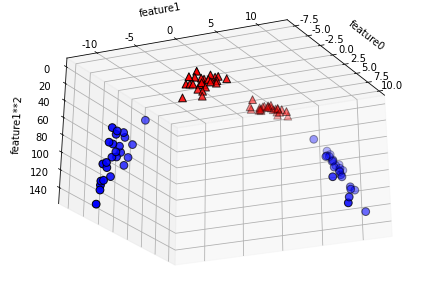

In [15]:
# 두 번째 특성을 제곱한 특성1**2를 새로운 특성으로 추가해 입력 특성을 확장해 볼 것
# 이제 (특성0, 특성1) 2차원 데이터 포인트가 아니라 (특성0,특성1,특성1**2)의 3차원 데이터 포인트로 표현 됨

# 두 번째 특성을 제곱하여 추가함

X_new=np.hstack([X,X[:,1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure=plt.figure()

# 3차원 그래프
ax=Axes3D(figure, elev=152, azim=-26)
# y==0인 포인트를 먼저 그리고 그 다음 y==1인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',marker="^", cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2')

Text(0.5, 0, 'feature1**2')

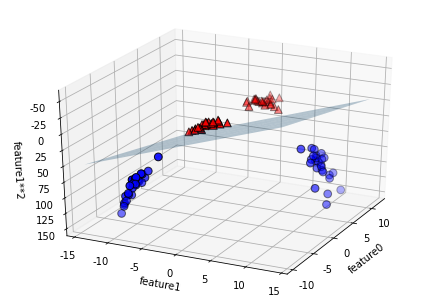

In [12]:
# 새로운 데이터셋에서는 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분할 수 있음

linear_svm_3d=LinearSVC(max_iter=5000).fit(X_new, y)
coef,intercept=linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax=Axes3D(figure, elev=-152, azim=-26)
xx=np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy=np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8, alpha=.3)
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r',marker="^", cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2')

Text(0, 0.5, 'feature1')

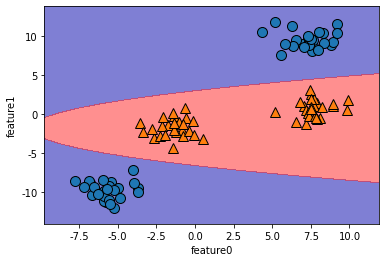

In [16]:
# 원래 특성으로 투영해보면 이 선형 SVM모델은 더 이상 선형이 아님
# 직선보다 타원에 가까운 모습임

ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=.5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature0")
plt.ylabel("feature1")

### 커널 기법
- 앞에서는 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만듦
- 하지만 많은 경우 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 (예를 들면, 100개의 특성에서 가능한 모든 조합) 연산 비용이 커짐
- 수학적 기교를 사용해서 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킬 수 있음
- 이를 커널 기법이라 하고 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)를 계산함
- 서포트 벡터 머신에서 데이터 고차원 공간에 매핑하는 데 많이 사용하는 방법은 두 가지
- 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산(예를 들어, 특성1**2 X 특성2**5) 하는 다항식 커널이 있고 가우시안 커널로도 불리우는 RBF커널이 있음
- 가우시안 커널은 차원이 무한한 특성 공간에 매핑하는 것
- 가우시안 커널은 모든 차수의 모든 다항식을 고려한다고 이해하면 됨
- 특성의 중요도는 고차항이 될수록 줄어듦


---
### SVM 이해하기

- 학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 됨
- 일반적으로 훈련 데이터의 일부만 결정 경계를  만드는 데 영향을 줌
- 두 클래스 사이의 경계에 위치한 데이터 포인트
